# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [13]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
p = (60/100)
print('The probability of pick an apple is: {one}'.format(one=p))
q = (40/100)
print('The probability of pick an orange is: {one}'.format(one=q))

The probability of pick an apple is: 0.6
The probability of pick an orange is: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is placed in the basket. Therefore, every time we are taking 1 fruit from the same 100 fruits (sample with replacements). 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [23]:
# Probability that the first 5 fruits are all apples
apples_5= p**5
print(apples_5)

0.07775999999999998


In [25]:
# Probability that the first 5 fruits are all apples and the next 15 fruits are all oranges
orange_15 = q**15
orange_15*apples_5

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits, but this time we don't add any more fruits after selecting a fruit (sample without replacements).

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [19]:
# your code here
from scipy.stats import binom

In [27]:
apple = binom.pmf(5,20,0.6)
print(apple)
orange = binom.pmf(15,20,0.4)
print(orange)

0.0012944935222876511
0.0012944935222876511


In the lesson we also discussed CDF (cumulative distribution function). In Python, this can be calculated with the ```binom()``` function. Read the documentation in order to learn how to use it.


In the context of the above problem, **what is the probability that from the 20 selected fruits, less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [44]:
# your code here
less_than_5_apples = binom.cdf(4,20,0.6)
print(less_than_5_apples)

0.0003170311211686301


***Optional self learning: We will see matplotlib tomorrow.***

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

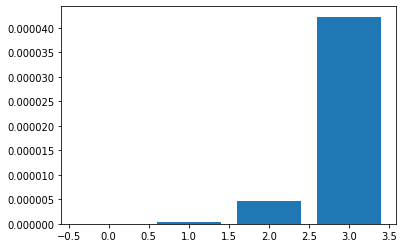

In [47]:
# your code here
# Please label the axes and give a title to the plot
from scipy.stats import binom 
import matplotlib.pyplot as plt 
# setting the values 
# of n and p 
n = 20
p = 0.6
# defining list of r values 
r_values = list(range(0,4)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.bar(r_values, dist) 
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in Python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [58]:
# your code here
import math

In [59]:
math.factorial(5)

120

In [60]:
prob_5_goals = (math.e)**-2.3 * (2.3**5) /math.factorial(5)
print(prob_5_goals)

0.05377502558194681


***Optional self learning: We will see matplotlib tomorrow.***


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

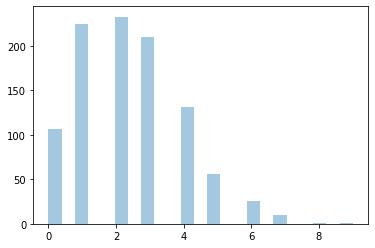

In [61]:
# your code here
# Please label the axes and give a title to the plot 
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.poisson(lam=2.3, size=1000), kde=False)

plt.show()